# Weather Forecast Model
*Modeling and Simulation in Python*

Class: Math 245 - Spring 2022

Team: Lillian Carrera, Sukhnandan Kaur, Alexandra Aucaquizhpi, Tasfia Hossain

## Project Statement

Based on the historical weather conditions from April 29th to May 7th (2019-2022), what will the weather conditions be for the next 30 days in New York?





### Importing Key Packages

Necessary imports for the simulation to run

In [ ]:
# Install Pint
try:
    import pint
except ImportError:
    !pip install pint

     |████████████████████████████████| 209 kB 17.4 MB/s 


In [ ]:
# Define download function. 
# Then download modsim.py if necessary


from os.path import basename, exists
cloudy = 0
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


First import the key libraries. When you use the `as` keyword, you are creating a shortcut so that you can reference functions from those libraries using the shorter name.

* We need `numpy` to create the matrices and vectors.
* We use the sublibrary `numpy.linalg` to do matrix operations.
* We need `pandas` for its DataFrame capabilities.
* We need `pyplot` to make beautiful graphics.

In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import Functions from modsim and pandas

from modsim import *
from pandas import read_html
from pandas import read_csv

###Downloading Data


In [ ]:
# reading the csv dataset from GitHub in Pandas 
# original data from "https://onlinelibrary.wiley.com/doi/10.1111/ecog.05553"

import pandas as pd 

WeatherData = 'https://raw.githubusercontent.com/Nandan01/WeatherData/main/WeatherData.csv' 
df = pd.read_csv(WeatherData, index_col=0)

df

,Rain_Percent,Cloud_Percent,Sunny_Percent
Date,,,
"April 29, 2019",15,51,36
"April 30, 2019",0,67,67
"May 01, 2019",23,73,50
"May 02, 2019",100,37,14
"May 03, 2019",57,87,30
"May 04, 2019",28,84,56
"May 05, 2019",100,100,0
"May 06, 2019",50,56,6
"April 29, 2020",72,62,10


Read in the 'WeatherData' and change the column headings to have shorter, simpler names.

In [ ]:
tables = pd.read_csv(WeatherData, header=0, index_col=0)
tables.columns = ['Rainy','Cloudy', 'Sunny' ]
tables['Rainy']= pd.to_numeric(tables['Rainy'])

In [ ]:
#convert the 'Rainy', 'Cloudy', and 'Sunny' percent values to numeric values to prevent 
r = tables.Rainy.values
c = tables.Cloudy.values
s = tables.Sunny.values

#r.sort()
#c.sort()
#s.sort()
print(tables)

                Rainy  Cloudy  Sunny
Date                                
April 29, 2019     15      51     36
April 30, 2019      0      67     67
May 01, 2019       23      73     50
May 02, 2019      100      37     14
May 03, 2019       57      87     30
May 04, 2019       28      84     56
May 05, 2019      100     100      0
May 06, 2019       50      56      6
April 29, 2020     72      62     10
April 30, 2020     72     100     28
May 01, 2020      100      75     25
May 02, 2020        0     100      0
May 03, 2020       70      54     16
May 04, 2020       23      45     22
May 05, 2020        0      22     22
May 06, 2020       50      53      3
April 29, 2021     61      69      8
April 30, 2021     61      60      1
May 01, 2021       45      48      3
May 02, 2021       56      83     27
May 03, 2021       55      82     27
May 04, 2021       59      73     14
May 05, 2021       72     100     28
May 06, 2021        0      53     53
April 29, 2022      0       4     96
A

## Historical Data Visualization

### Historical Bar Graphs

Going to be used to compare graphs produced from the simulation and evaluate if our simulation models the real-world situation

Use the python iloc() function to select particular rows of the dataset and represent them in the form of a bar graph

In [ ]:
#plot a bar graph for the 2019 Data 
def plot_estimates():
    tables.iloc[0:8].plot(kind = 'bar')
    decorate(xlabel='2019 Dates', 
             ylabel='# of occurences') 

The following bar graph figure plots the `2019 Historical Weather Condition Occurences`

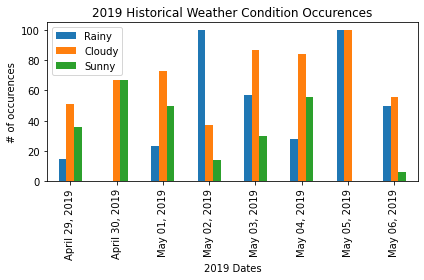

In [ ]:
plot_estimates()
decorate(title='2019 Historical Weather Condition Occurences')

In [ ]:
#plot the graph for the 2022 Data
def plot_estimates1():
    tables.iloc[25:32].plot(kind = 'bar')
    decorate(xlabel='2022 Dates', 
             ylabel='# of occurences') 

The following bar graph figure plots the `2022 Historical Weather Condition Occurences`. Notice how some of the days have multiple bars. This shows how the weather percentages for one day can overlap one another. In other words, it can be rainy, sunny, and cloudy all in one day. 

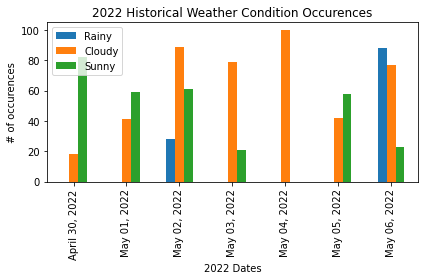

In [ ]:
plot_estimates1()
decorate(title='2022 Historical Weather Condition Occurences')

## Markov Chain in Python

Import `random` to generate a random initial state 

In [ ]:
import random

### Defining States 

In [ ]:
# Define the 3 states
states = ["Rainy", "Cloudy", "Sunny"]

In [ ]:
random.choice(states)

'Cloudy'

### Transition Matrix

Possible sequences of events that can occur 

In [ ]:
# RaRa = 'Rainy -> Rainy' | RaCl = 'Rainy -> Cloud' | RaSu = 'Rainy -> Sunny'
# ClRa = 'Cloudy -> Rainy' | ClCl = 'Cloudy -> Cloud' | ClSu = 'Cloudy -> Sunny'
# SuRa = 'Sunny -> Rainy' | SuCl = 'Sunny -> Cloud' | SuSu = 'Sunny -> Sunny'

transitionName = [["RaRa","RaCl", "RaSu"],["ClRa","ClCl", "ClSu"], ["SuRa", "SuCl", "SuSu"]]

Use historical dataset to calculate the transition matrix probailites 

In [ ]:
# Probabilities matrix (transition matrix)
transitionMatrix = [[.1, .4, .5],[.3, .4, .3],[.6, .2, .2]]

In [ ]:
random.choices(transitionName[0],weights=transitionMatrix[0])[0]

'RaRa'

In [ ]:
random.choices(transitionName[1],weights=transitionMatrix[1])[0]

'ClCl'

In [ ]:
random.choices(transitionName[2],weights=transitionMatrix[2])[0]

'SuRa'

### Simulation for what the next 30 days will be

Define `weatherForecast` to take in days as the parameter

In [ ]:
# A functions which implements the Markov model to forecast the weather

def weatherForecast(days):
    cloudyDays = 0
    sunnyDays = 0
    rainyDays = 0
    rain_rain = 0
    rain_cloud = 0
    rain_sun = 0
    cloud_rain = 0
    cloud_cloud = 0
    cloud_sun = 0
    sun_rain = 0
    sun_cloud = 0
    sun_sun = 0
   
    # Sets random probabilities for the states
    weatherToday = random.choice(states) 
    # Initializes change(the weather transition for tomorrow) and `i` for these values to be stored during the loop
    # Want to present the weather after day 8 since that will be the future weather 
    i = 8

    print("Starting weather: ",weatherToday)
    # Creates a while loop to predict the weather for the desired amount of days, in this case when it is greater than day 8 
    while i < days: 

# Depending on what it randomly chooses to start with, that is where the while loop will begin by comparing the weatherToday string
        
        # If the weather today is 'Rainy' increment the bar for rainy by 1
        if weatherToday == "Rainy":
            rainyDays +=1
            print("Day",i+1, ": \n Today is Rainy")

            # Randomly choose what the weather will be tomorrow based on the transition matrix probabilities
            change = random.choices(transitionName[0],weights=transitionMatrix[0])[0]
            if change == "RaRa":
              print(" Tomorrow is Rainy")
              rain_rain += 1
              # Changes the starting weather for today from 'change'
              # This is so that for the next day that is ran, the starting weather will be the previous day's predicted weather 
              weatherToday = "Rainy"
            elif change == "RaCl" :
              print(" Tomorrow is Cloudy")
              weatherToday = "Cloudy"
              rain_cloud += 1
            else :
              print(" Tomorrow is Sunny")
              weatherToday = "Sunny"
              rain_sun += 1

        # Else if the weather today is 'Cloudy' increment the bar for cloudy by 1
        elif weatherToday == "Cloudy":
            cloudyDays +=1
            print("Day",i+1, ": \n Today is Cloudy")

            # Randomly choose what the weather will be tomorrow based on the transition matrix probabilities
            change = random.choices(transitionName[1],weights=transitionMatrix[1])[0]
            if change == "ClRa":
              print(" Tomorrow is Rainy")
              weatherToday = "Rainy"
              cloud_rain += 1
            elif change == "ClCl" :
              print(" Tomorrow is Cloudy")
              weatherToday = "Cloudy"
              cloud_cloud += 1
            else :
              print(" Tomorrow is Sunny")
              weatherToday = "Sunny"
              cloud_sun += 1

        # Else if the weather today is 'Sunny' increment the bar for sunny by 1
        elif weatherToday == "Sunny":
            sunnyDays +=1
            print("Day",i+1, ": \n Today is Sunny")
            change = random.choices(transitionName[2],weights=transitionMatrix[2])[0]
            if change == "SuRa":
              print(" Tomorrow is Rainy")
              weatherToday = "Rainy"
              sun_rain += 1
            elif change == "SuCl" :
              print(" Tomorrow is Cloudy")
              weatherToday = "Cloudy" 
              sun_cloud += 1   
            else :
              print(" Tomorrow is Sunny")
              weatherToday = "Sunny"
              sun_sun += 1


   
        # Increment i to run to the next day
        i += 1

    totalDays = cloudyDays + sunnyDays + rainyDays
    print("\nTotal count of recorded days : " + str(totalDays) + " \n")
    print("   Sunny Days : " + str(sunnyDays) +", with average of : "+ str((sunnyDays/totalDays)*100) +"%")
    print("   Cloudy Days : " + str(cloudyDays) +", with average of : "+ str((cloudyDays/totalDays)*100) +"%")
    print("   Rainy Days : " + str(rainyDays) +", with average of : "+ str((rainyDays/totalDays)*100) +"%")


    # Plot the bar graph for the total number of weather condition occurences for after day 8 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    weather_ = ['Sunny\n'+str(sunnyDays), 'Cloudy\n'+str(cloudyDays), 'Rainy\n'+str(rainyDays)]
    conditions = [sunnyDays,cloudyDays,rainyDays]
    ax.bar(weather_,conditions, color=['yellow', 'gray', 'blue'])
    ax.set_ylabel('# of occurances')
    ax.set_xlabel('Weather Conditions')
    ax.set_title('Total # of Weather Condition Occurances')
    
    plt.show()

The following bar graph figure plots the `Total # of Weather Condition Occurences`. Showcases the number of times `sunny`, `rainy`, and `cloudy` days occur after day 8. Used to compare the amount of weather condition occurences from historical data. 

Starting weather:  Rainy
Day 9 : 
 Today is Rainy
 Tomorrow is Cloudy
Day 10 : 
 Today is Cloudy
 Tomorrow is Rainy
Day 11 : 
 Today is Rainy
 Tomorrow is Cloudy
Day 12 : 
 Today is Cloudy
 Tomorrow is Rainy
Day 13 : 
 Today is Rainy
 Tomorrow is Rainy
Day 14 : 
 Today is Rainy
 Tomorrow is Cloudy
Day 15 : 
 Today is Cloudy
 Tomorrow is Rainy
Day 16 : 
 Today is Rainy
 Tomorrow is Cloudy
Day 17 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 18 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 19 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 20 : 
 Today is Cloudy
 Tomorrow is Sunny
Day 21 : 
 Today is Sunny
 Tomorrow is Rainy
Day 22 : 
 Today is Rainy
 Tomorrow is Sunny
Day 23 : 
 Today is Sunny
 Tomorrow is Rainy
Day 24 : 
 Today is Rainy
 Tomorrow is Sunny
Day 25 : 
 Today is Sunny
 Tomorrow is Rainy
Day 26 : 
 Today is Rainy
 Tomorrow is Cloudy
Day 27 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 28 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 29 : 
 Today is Cloudy
 Tomorrow is Cloudy
Day 30 : 


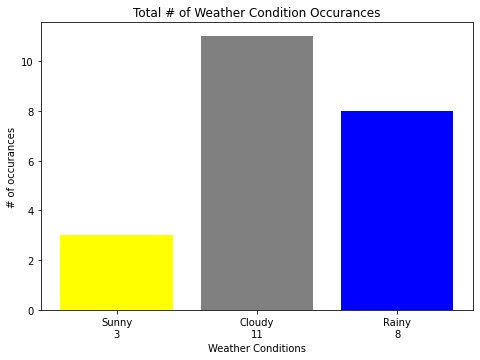

In [ ]:
#How many days do you want to predict the weather for? 30 days
weatherForecast(30)